In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets 
from sklearn.model_selection import train_test_split

In [2]:
bc = sklearn.datasets.load_breast_cancer()
df = pd.DataFrame(bc.data,columns=bc.feature_names)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df['label'] = bc.target
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [5]:
df.shape
#30 Features are present!

(569, 31)

In [6]:
x = df.drop(columns='label',axis=1)
y = df['label']

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.fit_transform(x_test)

In [10]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [11]:
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(30,)),
            keras.layers.Dense(20,activation='relu'),
            keras.layers.Dense(2, activation='sigmoid')
])

In [12]:
model.compile(optimizer='adam','
              # loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [13]:
#This model kinda sucks make it better at home!
history = model.fit(x_train_std,y_train,validation_split=0.1,epochs=25)

Epoch 1/25


C:\Users\Student\AppData\Roaming\Python\Python39\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


13/13 [==============================] - 1s 16ms/step - loss: 0.8540 - accuracy: 0.3496 - val_loss: 0.5815 - val_accuracy: 0.6304
Epoch 2/25
13/13 [==============================] - 0s 4ms/step - loss: 0.5939 - accuracy: 0.6504 - val_loss: 0.4183 - val_accuracy: 0.8478
Epoch 3/25
13/13 [==============================] - 0s 3ms/step - loss: 0.4414 - accuracy: 0.8753 - val_loss: 0.3213 - val_accuracy: 0.9348
Epoch 4/25
13/13 [==============================] - 0s 3ms/step - loss: 0.3480 - accuracy: 0.9218 - val_loss: 0.2547 - val_accuracy: 0.9565
Epoch 5/25
13/13 [==============================] - 0s 3ms/step - loss: 0.2865 - accuracy: 0.9413 - val_loss: 0.2065 - val_accuracy: 1.0000
Epoch 6/25
13/13 [==============================] - 0s 3ms/step - loss: 0.2431 - accuracy: 0.9487 - val_loss: 0.1706 - val_accuracy: 1.0000
Epoch 7/25
13/13 [==============================] - 0s 3ms/step - loss: 0.2101 - accuracy: 0.9560 - val_loss: 0.1439 - val_accuracy: 1.0000
Epoch 8/25
13/13 [============

In [21]:
test_loss, test_acc = model.evaluate(x_test_std, y_test, verbose=2)

print('\nTest accuracy:\n Test loss:', test_acc,test_loss)

4/4 - 0s - loss: 0.1016 - accuracy: 0.9561 - 23ms/epoch - 6ms/step

Test accuracy:
 Test loss: 0.9561403393745422 0.10161192715167999


In [15]:
probability_model = keras.Sequential([model, 
                                         keras.layers.Softmax()])

In [16]:
predictions = probability_model.predict(x_test_std)

4/4 [==============================] - 0s 0s/step


In [17]:
predicted_labels = []
for i in predictions:
    predicted_labels.append(np.argmax(i))

predicted_labels

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1]

In [18]:
y_test

410    1
282    0
379    0
373    0
35     0
      ..
86     0
53     0
183    1
320    1
558    1
Name: label, Length: 114, dtype: int32

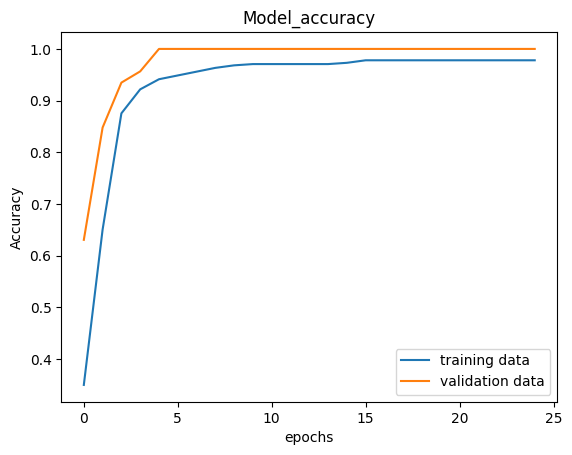

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model_accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

plt.legend(['training data','validation data'], loc = 'lower right')

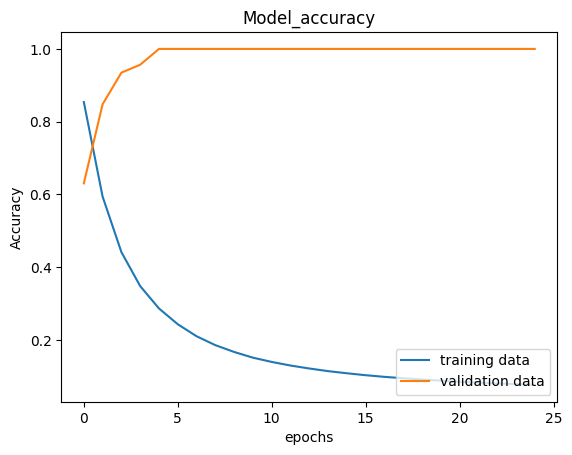

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])

plt.title('Model_accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

plt.legend(['training data','validation data'], loc = 'lower right')